In [200]:
%matplotlib inline

In [201]:
import numpy as np
import scipy
from math import pi
from scipy.integrate import complex_ode
import matplotlib.pyplot as plt

## Define a linblad master equation function
To give to `scipy.integrate`

In [202]:
def linblad_master_eq(ham, ls, gamma):
    d = ham.shape[0]
    lls = [l.H * l for l in ls]
    
    def gen_l_terms(rho):
        # Generate the linbladian terms, closed over ls
        for l, ll in zip(ls, lls):
            yield (l * rho * l.H) - 0.5 * ((rho * ll) + (ll * rho))
    
    def foo(t, y):
        # `t` parameter required for scipy.integrate
        # reshaping from and to a 1d-array likewise required
        rho = y.reshape(d, d)  
        #  Von neumann term
        rd = -1.0j * (ham * rho - rho * ham)
        # Add linbladian term
        rd += gamma * sum(gen_l_terms(rho))
        # convert back to vector
        return np.asarray(rd).reshape(-1)  
    
    return foo

## FMO complex Hamiltonian

In [203]:
ham = np.matrix([
    [215, -104.1, 5.1, -4.3, 4.7, -15.1, -7.8],
    [-104.1, 220.0, 32.6, 7.1, 5.4, 8.3, 0.8],
    [5.1, 32.6, 0.0, -46.8, 1.0, -8.1, 5.1],
    [-4.3, 7.1, -46.8, 125.0, -70.7, -14.7, -61.5],
    [4.7, 5.4, 1.0, -70.7, 450.0, 89.7, -2.5],
    [-15.1, 8.3, -8.1, -14.7, 89.7, 330.0, 32.7],
    [-7.8, 0.8, 5.1, -61.5, -2.5, 32.7, 280.0]
    ], dtype=complex)
d = ham.shape[0]
ham += (-100j/3) * np.eye(d, dtype=complex)  # recomb
ham[2, 2] += (-0.1j/3)  # trap
ham

matrix([[ 215.0-33.33333333j, -104.1 +0.j        ,    5.1 +0.j        ,
           -4.3 +0.j        ,    4.7 +0.j        ,  -15.1 +0.j        ,
           -7.8 +0.j        ],
        [-104.1 +0.j        ,  220.0-33.33333333j,   32.6 +0.j        ,
            7.1 +0.j        ,    5.4 +0.j        ,    8.3 +0.j        ,
            0.8 +0.j        ],
        [   5.1 +0.j        ,   32.6 +0.j        ,    0.0-33.36666667j,
          -46.8 +0.j        ,    1.0 +0.j        ,   -8.1 +0.j        ,
            5.1 +0.j        ],
        [  -4.3 +0.j        ,    7.1 +0.j        ,  -46.8 +0.j        ,
          125.0-33.33333333j,  -70.7 +0.j        ,  -14.7 +0.j        ,
          -61.5 +0.j        ],
        [   4.7 +0.j        ,    5.4 +0.j        ,    1.0 +0.j        ,
          -70.7 +0.j        ,  450.0-33.33333333j,   89.7 +0.j        ,
           -2.5 +0.j        ],
        [ -15.1 +0.j        ,    8.3 +0.j        ,   -8.1 +0.j        ,
          -14.7 +0.j        ,   89.7 +0.j        ,  3

## Lindblad operators

In [204]:
def gen_ls():
    for i in range(d):
        l = np.zeros((d, d), dtype=complex)
        l = np.asmatrix(l)
        l[i, i] = 1
        yield l

gen = gen_ls()
ls = []
for i in range(0,7):
    ls.append(next(gen))
    
gamma = (2 * pi) * (296 * 0.695) * (35.0 / 150)
gamma

301.6012723250297

In [205]:
ls

[matrix([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
         [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
         [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
         [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
         [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
         [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
         [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]]),
 matrix([[ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
         [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
         [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
         [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
         [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
         [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
         [ 0.+0.j,  0.+0.j,  0.+0.j,

## Instance of the linblad equation

In [206]:
leq = linblad_master_eq(ham, ls, gamma)
leq

<function __main__.linblad_master_eq.<locals>.foo>

## Starting state and times

In [207]:
rho0= ls[0]
ti = 0
tf = 1
dt = 101
ts = np.linspace(ti, tf, dt)

## Initiate scipy integrator and evolve

In [208]:
stepper = complex_ode(leq)
stepper.set_integrator('dop853', nsteps=0, first_step=0.01)
stepper.set_initial_value(np.asarray(rho0).reshape(-1), ti)

# array for population values
xs = np.empty((d, len(ts)), dtype=float)

for i, t in enumerate(ts):
    stepper.integrate(t)
    rhot = np.asmatrix(stepper.y.reshape(d, d))
    xs[:, i] = np.diag(rhot).real

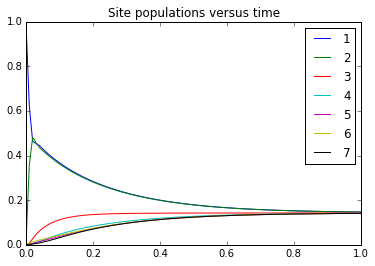

In [209]:
plt.plot(ts, xs[0, :], label='1')
plt.plot(ts, xs[1, :], label='2')
plt.plot(ts, xs[2, :], label='3')
plt.plot(ts, xs[3, :], label='4')
plt.plot(ts, xs[4, :], label='5')
plt.plot(ts, xs[5, :], label='6')
plt.plot(ts, xs[6, :], label='7')
plt.legend(loc='upper right')
plt.title('Site populations versus time')
plt.show()


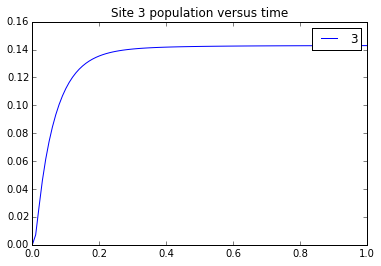

In [210]:
plt.plot(ts, xs[2, :], label='3')
plt.legend(loc='upper right')
plt.title('Site 3 population versus time')